# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,1
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,2
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,1
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380,1
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,2
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450,1
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [2]:
# Your code to evaluate data, and train and evaluate a classification model
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import gridspec

First, let's see if there are missing values.

In [2]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

There are no missing values. Let's check the distribution and check for outliers .

In [3]:
def print_stats(var):
   
# the stats
    mean_var = var.mean()
    std_var = var.std()
    min_var = var.min()
    q01_var = var.quantile(0.01)
    q25_var = var.quantile(0.25)
    median_var = var.median()
    q75_var = var.quantile(0.75)
    q99_var = var.quantile(0.99)
    max_var = var.max()
    mode_var = var.mode()[0]
    
    stats = 'Mean          : {:.2f}\nStd.Dev      : {:.2f}\nMode          : {:.2f}\nMinimum    : {:.2f}\n01-quantile: {:.2f}\n25-quantile: {:.2f}\nMedian       : {:.2f}\n75-quantile: {:.2f}\n99-quantile: {:.2f}\nMaximum   : {:.2f}'.format(
                                mean_var
                               ,std_var
                               ,mode_var
                               ,min_var
                               ,q01_var
                               ,q25_var
                               ,median_var
                               ,q75_var
                               ,q99_var 
                               ,max_var)
   
    # set up figure
    fig, ax = plt.subplots(2, 1
                    ,figsize = (15, 5)
                    ,sharex = True
                    ,gridspec_kw = {'hspace': 0
                                   ,'height_ratios': [5, 1]})
   

 
    fig.suptitle('Distribution ' + var.name)
    
    # histogram
    ax[0].hist(var,  bins = np.arange(min_var, max_var, (q99_var - q01_var)/15))
    ax[0].set_ylabel('Frequency')
    # stat-lines
    ax[0].axvline(x = q01_var, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = q99_var, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x = mean_var, color = 'black', linestyle ='solid', linewidth = 2)
    ax[0].axvline(x = median_var, color = 'black', linestyle='dashed', linewidth = 2)

    ax[0].annotate(stats, xy = (.85, .5), xycoords='axes fraction')
    
    # boxplot
    ax[1].boxplot(var, vert = False)
    ax[1].set_xlabel('Value')

    ax[0].label_outer()
    #fig.show()

In [36]:
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']
labels = 'WineVariety'

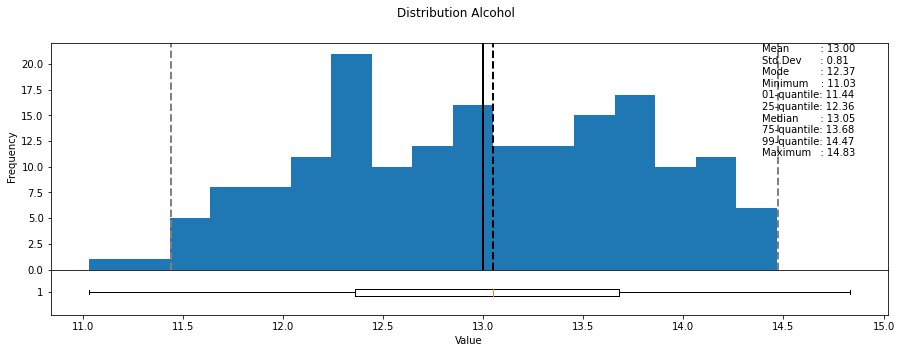

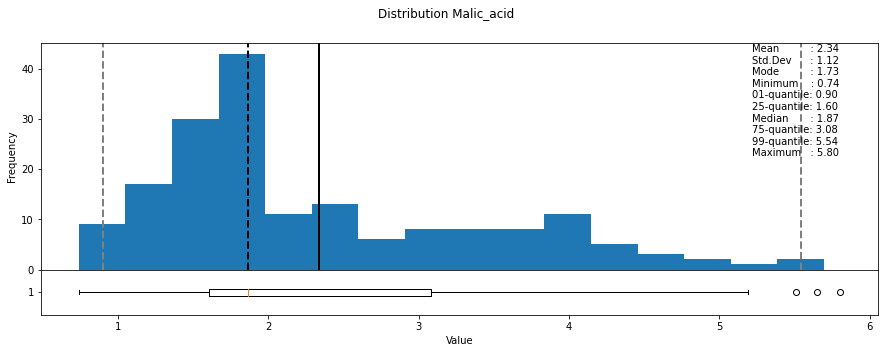

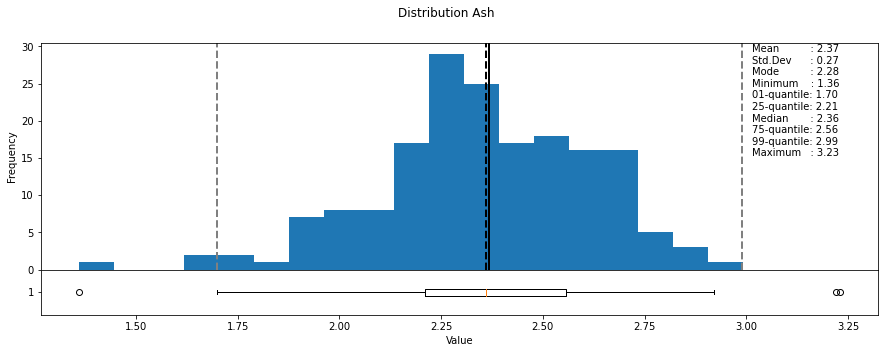

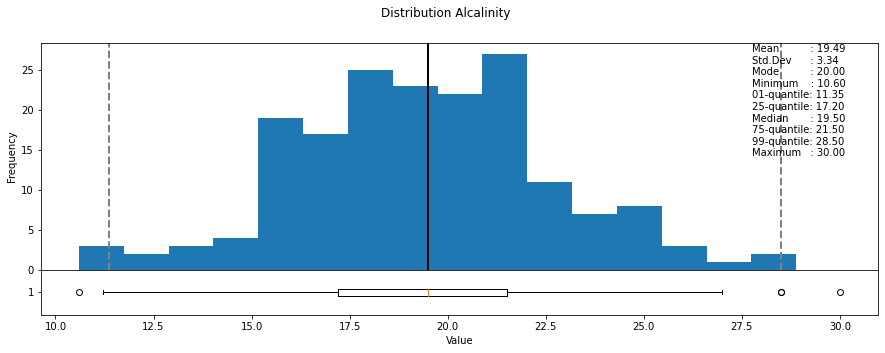

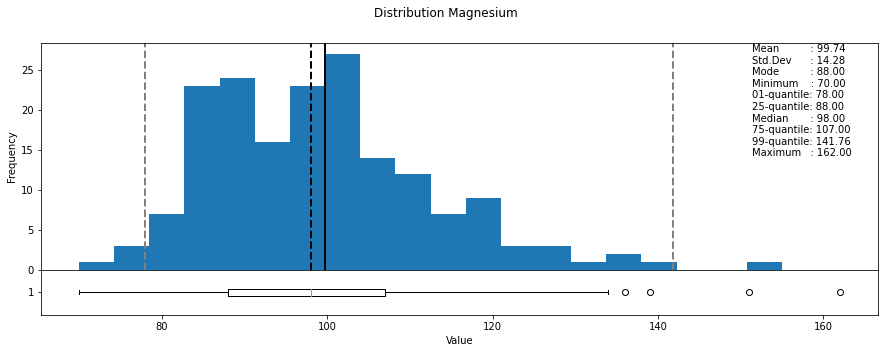

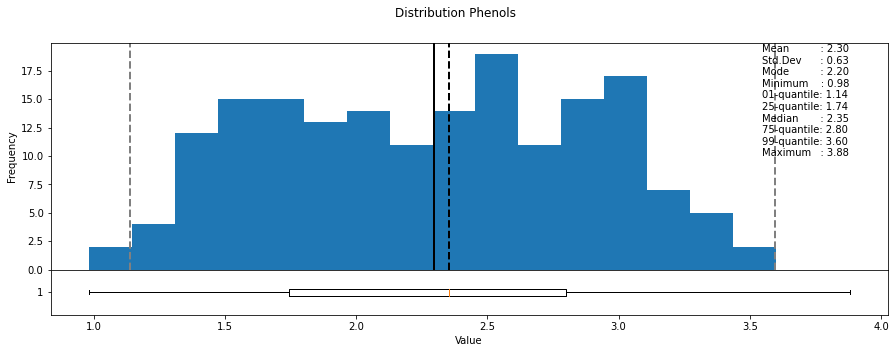

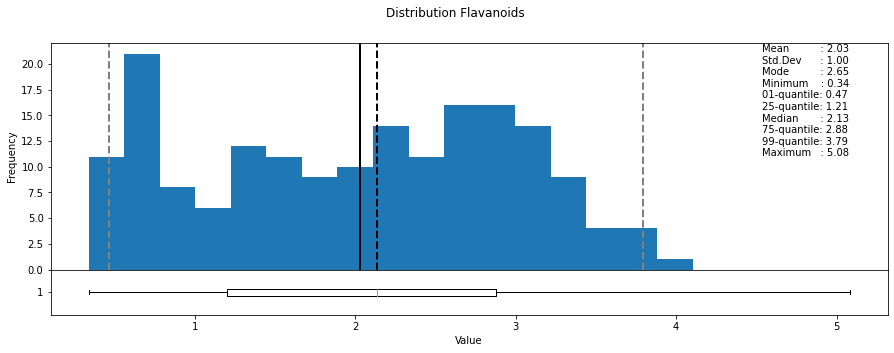

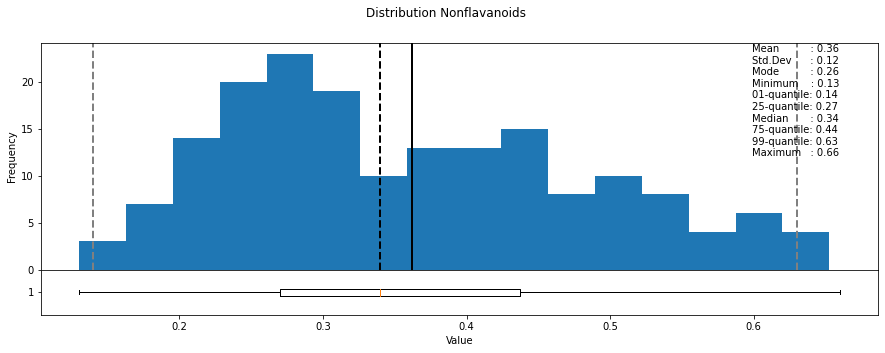

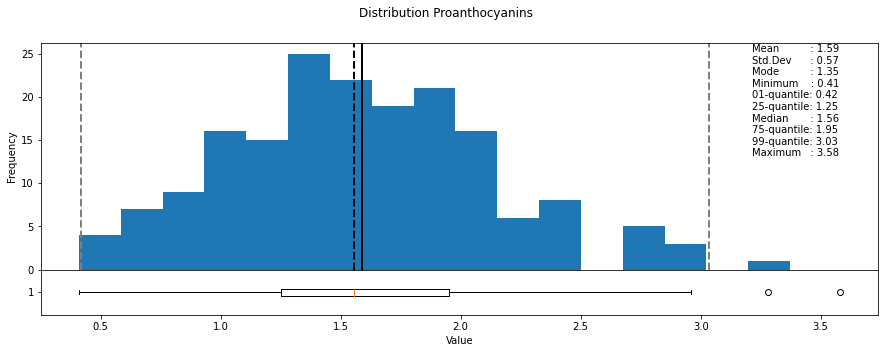

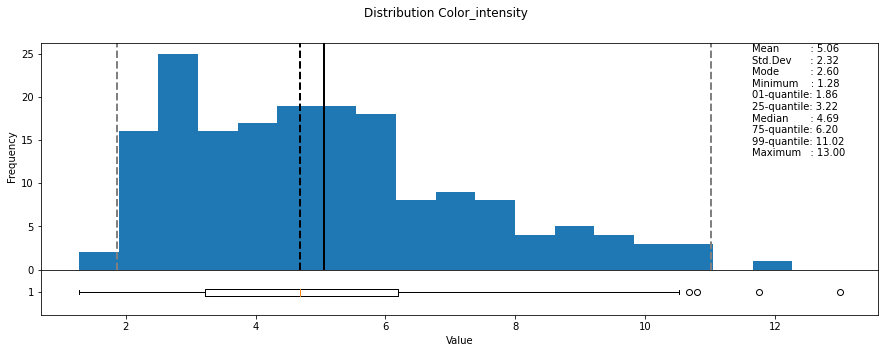

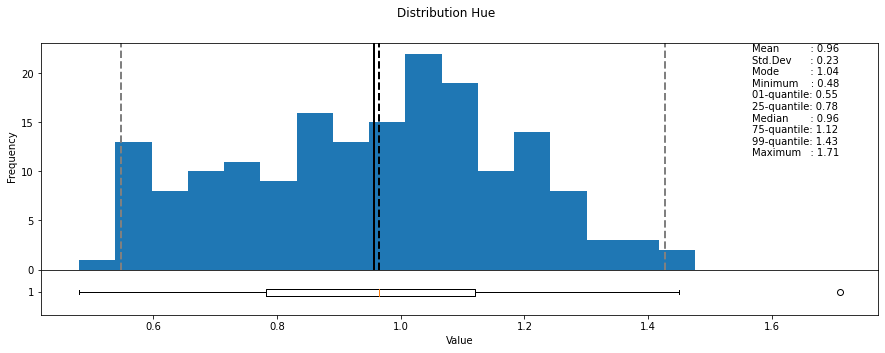

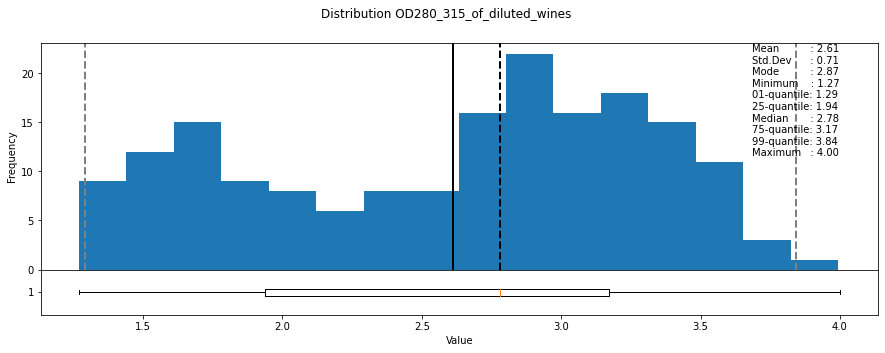

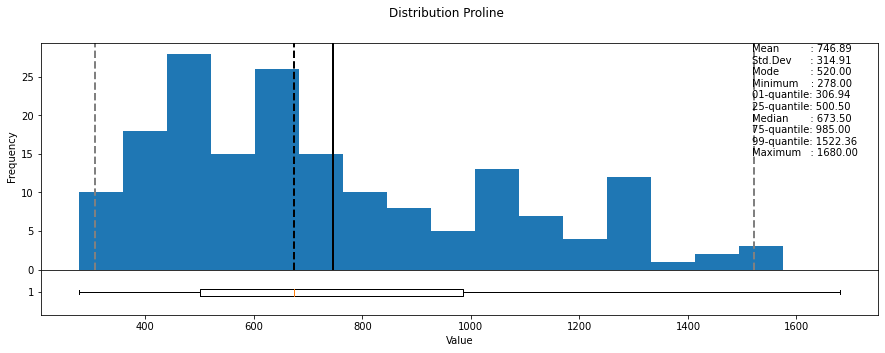

In [37]:
for ft in data[features]:
    print_stats(data[ft])

How many varieties are there?

In [9]:
varieties = ['variety A', 'variety B', 'variety C']
#data.groupby(labels).size()
data[labels].value_counts()

WineVariety
1              71
0              59
2              48
dtype: int64

Check the features by the varieties:

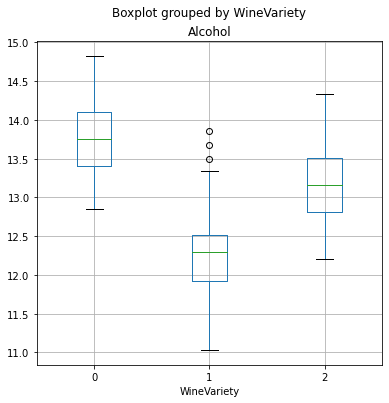

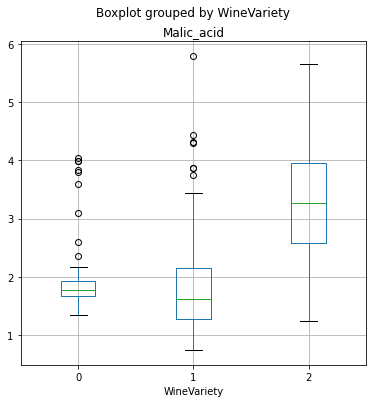

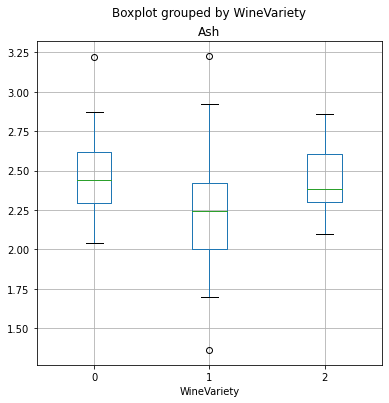

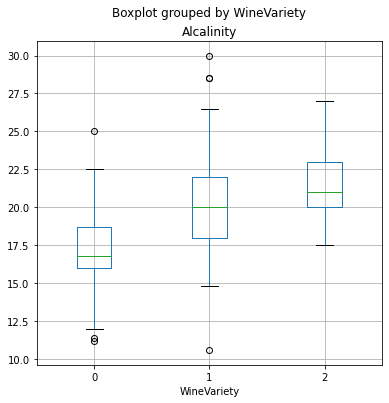

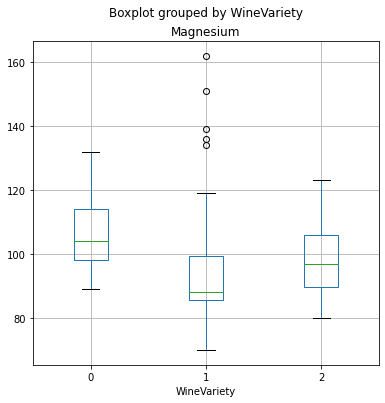

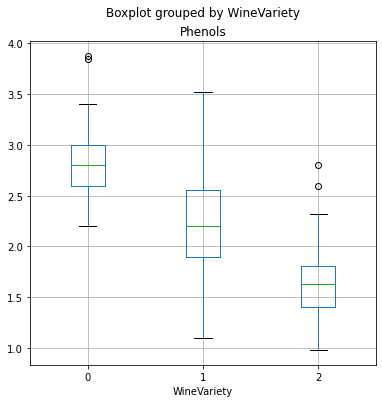

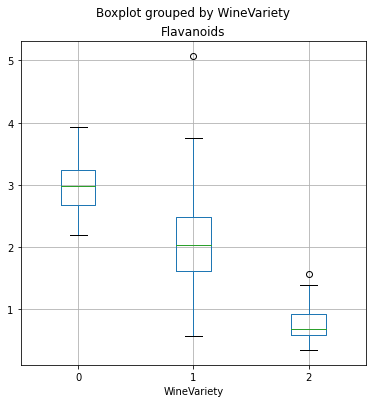

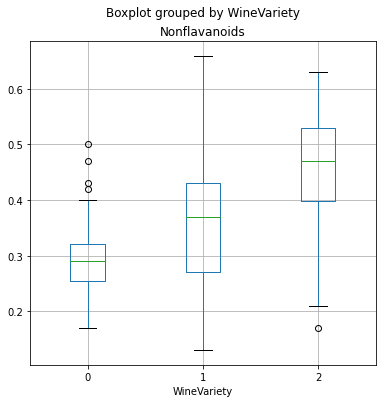

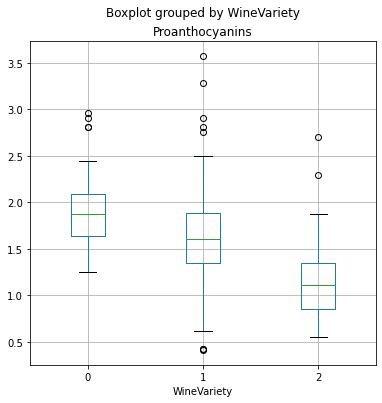

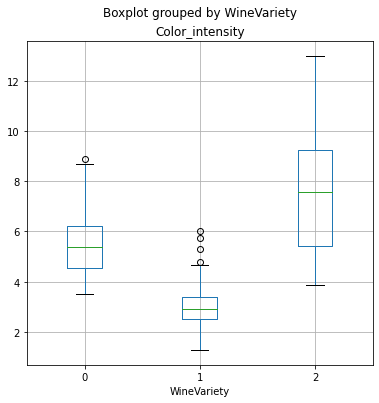

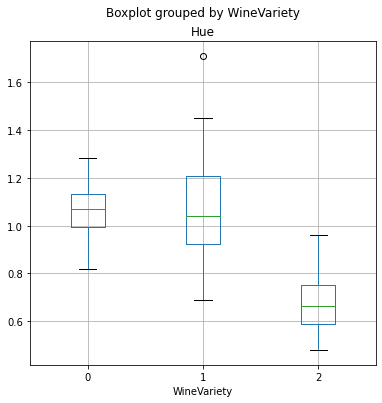

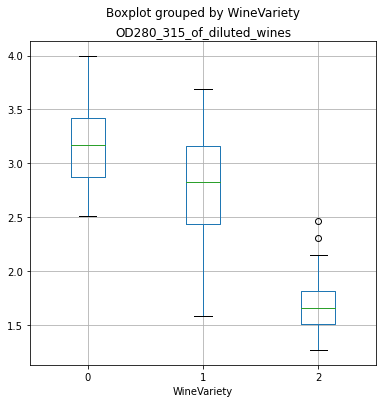

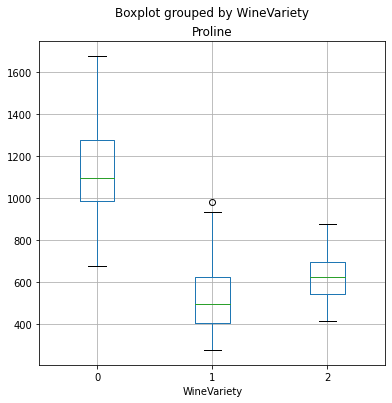

In [38]:
for col in features:
    data.boxplot(column = col, by = labels, figsize=(6,6))
    plt.title(col)
plt.show()

Now, let's create some models, first split the data into a training and test set.

In [39]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X, y = data[features].values, data[labels].values

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y
                                                   ,test_size = 0.30
                                                   ,random_state = 0
                                                   ,stratify = y)

print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 124, Test Set: 54 



Start with Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class = 'auto', max_iter=10000).fit(x_train, y_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [ ]:
Now apply the model on the testset and see some statistics

In [43]:
predictions = multi_model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report
# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)
# print cassification report
print(classification_report(y_test, predictions))

[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
The overall Recall must be at least 0.95

In [48]:
from sklearn.metrics import  recall_score
print("Overall Recall:", recall_score(y_test, predictions, average='macro'))

Overall Recall: 0.9682539682539683


That's better than than 0.95. Let's see the ROC.

Average AUC: 0.9995189995189996


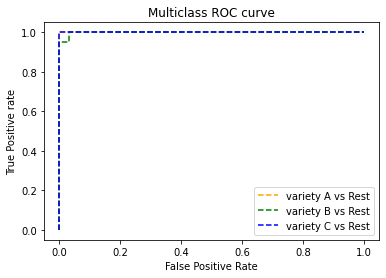

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Get class probability scores
wine_prob = multi_model.predict_proba(x_test)
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(varieties)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, wine_prob[:,i], pos_label=i)

auc = roc_auc_score(y_test, wine_prob, multi_class ='ovr')
print('Average AUC:', auc)
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle = '--', color = 'orange', label = varieties[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle = '--', color = 'green',  label = varieties[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle = '--', color = 'blue',   label = varieties[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Now, export the model

In [64]:
import joblib

# Save the model as a pickle file
filename = '.././models/wine_lr_model.pkl'
joblib.dump(multi_model, filename)

['.././models/wine_lr_model.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [ ]:
# Your code to predict classes for the two new samples

In [68]:
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
         [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
multi_model = joblib.load(filename)
new_prediction = multi_model.predict(x_new)   
for prediction in new_prediction:
    print(prediction, '(' + varieties[prediction] +')')

0 (variety A)
1 (variety B)


Ok, now the piplines
see: [A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

Construct a pipeline for Logistic Regression (same like before)

In [76]:
from sklearn.pipeline import Pipeline
reg = 0.1
steps = [('lr_model', LogisticRegression(C = 1/reg, solver='lbfgs', multi_class = 'auto', max_iter=10000))]
pipeline = Pipeline(steps)

my_model = pipeline.fit(x_train, y_train)


In [ ]:
See how we have done:

In [73]:
predictions = my_model.predict(x_test) 

In [74]:
print("Overall Recall:", recall_score(y_test, predictions, average='macro'))
#            0.9682539682539683

Overall Recall: 0.9682539682539683


It's the same model, now let's do some preprocessing 

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# numeric feautures
numeric_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# scaler
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
    ])
# apply 
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver = "liblinear"))])  


In [124]:
model = pipeline.fit(x_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('logregressor',
                 LogisticRegression(C=10.0, solver='liblinear'))])


In [125]:
predictions = model.predict(x_test) 
print("Overall Recall:", recall_score(y_test, predictions, average='macro'))
#            0.9682539682539683

Overall Recall: 1.0


In [129]:
# ff lomp
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(x_train, y_train)
    rc = recall_score(y_test, predictions, average = 'macro')   
    print(classifier)
    #print("model score: %.3f" % pipe.score(x_test, y_test))
    print("Recall: %.3f" % rc)

KNeighborsClassifier(n_neighbors=3)
Recall: 1.000
SVC(C=0.025, probability=True)
Recall: 1.000
NuSVC(probability=True)
Recall: 1.000
DecisionTreeClassifier()
Recall: 1.000
RandomForestClassifier()
Recall: 1.000
AdaBoostClassifier()
Recall: 1.000
GradientBoostingClassifier()
Recall: 1.000
